In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_auc_score

# 1.Import Dataset

In [3]:
data=pd.read_csv('loan_data.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,09-08-2016,10-07-2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,09-08-2016,10-07-2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,09-08-2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,09-09-2016,10-08-2016,28,college,female
4,6,6,PAIDOFF,1000,30,09-09-2016,10-08-2016,29,college,male


In [4]:
df=data.drop(['Unnamed: 0','Unnamed: 0.1'],1)

In [407]:
df.shape

(346, 8)

# 2.Convert to date time object

In [5]:
df['effective_date']=pd.to_datetime(df['effective_date'])
df['due_date']=pd.to_datetime(df['due_date'])

In [6]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null datetime64[ns]
due_date          346 non-null datetime64[ns]
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 21.7+ KB


# 3. Check the count of each class in data set 

In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [9]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [10]:
df['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

# 4.Create bins using columns Principal ,store it to new variable name called bins and Plot columns Gender Vs loan_status using histogram??

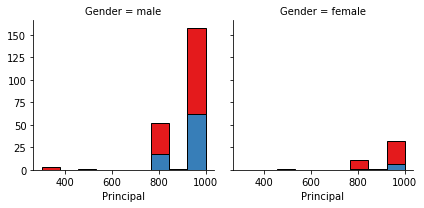

In [11]:
bins=np.linspace(df['Principal'].min(),df['Principal'].max(),10)
GL=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
GL.map(plt.hist, 'Principal', bins=bins, ec="k")


# 5. Create bins using columns age store it to new variable name called bins, and Plot gender vs loan_status using the newly created bins?

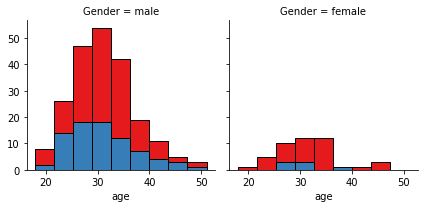

In [12]:
bins=np.linspace(df['age'].min(),df['age'].max(),10)
GL=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
GL.map(plt.hist, 'age', bins=bins, ec="k")


# 6. Create new column name called dayofweek, using dayofweek plot the histogram Gender Vs loan_status and create the bins separately?

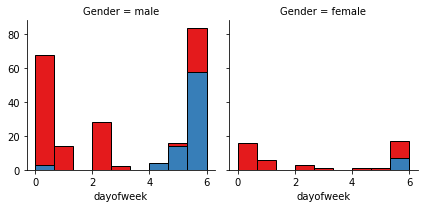

In [13]:
df['dayofweek']=df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")

# 7.Create new column called Month and create bins using new column and plot a histogram. Look at the Months people get the loan and write your observations?

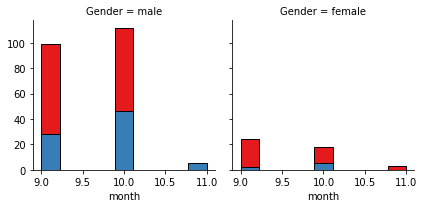

In [14]:
df['month']=df['due_date'].dt.month
bins = np.linspace(df.month.min(), df.month.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist,'month', bins=bins, ec="k")

In [15]:
df['weekend']=df['dayofweek'].apply(lambda x :1 if (x>3) else 0)

# 8 Convert Categorical features to numerical values using One Hot Encoding

In [16]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,month,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,10,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,10,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,9,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,10,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,10,1


In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64


There are only two people with Master or Above degress,one of them has paid off the loan and the other one hasn't.As a result keeping 'Master or Above' in our data set wont't help much! so we drop it.

In [18]:
Features=df[['Principal','terms','age','Gender','dayofweek','weekend']]
Features=pd.concat([Features,pd.get_dummies(df['education'])],axis=1)
Features.head()

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,male,3,0,0,1,0,0
1,1000,30,33,female,3,0,1,0,0,0
2,1000,15,27,male,3,0,0,0,0,1
3,1000,30,28,female,4,1,0,0,0,1
4,1000,30,29,male,4,1,0,0,0,1


In [19]:
Features=Features.drop('Master or Above',1)
Features.head()

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,45,male,3,0,0,1,0
1,1000,30,33,female,3,0,1,0,0
2,1000,15,27,male,3,0,0,0,1
3,1000,30,28,female,4,1,0,0,1
4,1000,30,29,male,4,1,0,0,1


In [20]:
Features['Gender']=pd.get_dummies(Features['Gender'])

In [21]:
Features.head()

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,0,1,0
1,1000,30,33,1,3,0,1,0,0
2,1000,15,27,0,3,0,0,0,1
3,1000,30,28,1,4,1,0,0,1
4,1000,30,29,0,4,1,0,0,1


# 9 Normalize Data and split the data into train = 70% and test size = 30%

In [22]:
x=Features
y=df['loan_status'].replace(['PAIDOFF','COLLECTION'],value=(0,1))

In [23]:
sc=StandardScaler()
X=sc.fit_transform(x)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

# 10 Build Model

# LogisticRegression

In [25]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy_score(y_pred,y_test)

C:\Users\Sangita\Anaconda1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7692307692307693

In [26]:
model=[]
F1_Score=[]
Roc_acu_score=[]

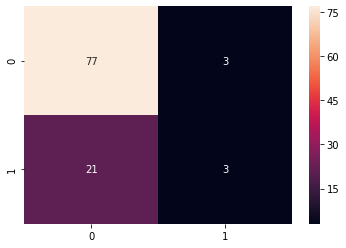

In [27]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [28]:
model=['LR']
F1_Score=[f1_score(y_pred,y_test,average='weighted')]
Roc_acu_score=[roc_auc_score(y_test,y_pred)]

In [29]:
model,F1_Score,Roc_acu_score

(['LR'], [0.8267934312878134], [0.54375])

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        80
           1       0.50      0.12      0.20        24

    accuracy                           0.77       104
   macro avg       0.64      0.54      0.53       104
weighted avg       0.72      0.77      0.71       104



# KNN Model

In [31]:
knn=KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
y_pred=knn.predict(x_test)

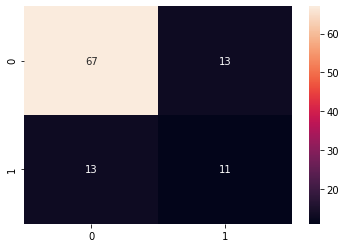

In [33]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [34]:
f1=f1_score(y_pred,y_test,average='weighted')
Roc_acu_score.append(roc_auc_score(y_test,y_pred))

In [35]:
model.append('KNN')
F1_Score.append(f1_score(y_pred,y_test,average='weighted'))

In [36]:
model,F1_Score,Roc_acu_score

(['LR', 'KNN'], [0.8267934312878134, 0.75], [0.54375, 0.6479166666666667])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        80
           1       0.46      0.46      0.46        24

    accuracy                           0.75       104
   macro avg       0.65      0.65      0.65       104
weighted avg       0.75      0.75      0.75       104



# SVM

In [38]:
sv=SVC()
sv.fit(x_train,y_train)

C:\Users\Sangita\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

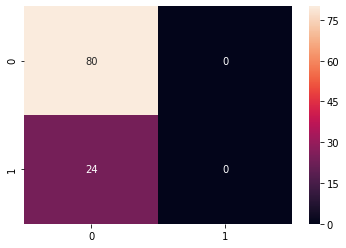

In [39]:
y_pred=sv.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [40]:
model.append('SVM')
F1_Score.append(f1_score(y_pred,y_test,average='weighted'))
Roc_acu_score.append(roc_auc_score(y_test,y_pred))

C:\Users\Sangita\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [41]:
model,F1_Score,Roc_acu_score

(['LR', 'KNN', 'SVM'],
 [0.8267934312878134, 0.75, 0.8695652173913044],
 [0.54375, 0.6479166666666667, 0.5])

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        80
           1       0.00      0.00      0.00        24

    accuracy                           0.77       104
   macro avg       0.38      0.50      0.43       104
weighted avg       0.59      0.77      0.67       104



C:\Users\Sangita\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [43]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)

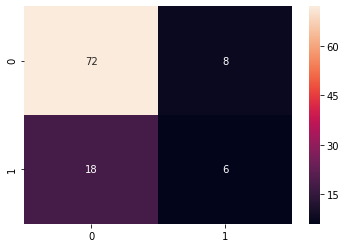

In [44]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [45]:
model.append('Decision Tree')
F1_Score.append(f1_score(y_test,y_pred,average='weighted'))
Roc_acu_score.append(roc_auc_score(y_test,y_pred))

In [46]:
model,F1_Score,Roc_acu_score

(['LR', 'KNN', 'SVM', 'Decision Tree'],
 [0.8267934312878134, 0.75, 0.8695652173913044, 0.7244582043343654],
 [0.54375, 0.6479166666666667, 0.5, 0.575])

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        80
           1       0.43      0.25      0.32        24

    accuracy                           0.75       104
   macro avg       0.61      0.57      0.58       104
weighted avg       0.71      0.75      0.72       104



# Random Forest

In [48]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

C:\Users\Sangita\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

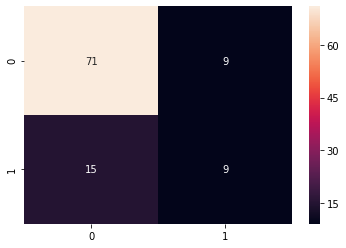

In [49]:
y_pred=RF.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [50]:
model.append('RandomForest')
F1_Score.append(f1_score(y_test,y_pred))
Roc_acu_score.append(roc_auc_score(y_test,y_pred))

In [51]:
model,F1_Score,Roc_acu_score

(['LR', 'KNN', 'SVM', 'Decision Tree', 'RandomForest'],
 [0.8267934312878134,
  0.75,
  0.8695652173913044,
  0.7244582043343654,
  0.42857142857142855],
 [0.54375, 0.6479166666666667, 0.5, 0.575, 0.63125])

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        80
           1       0.50      0.38      0.43        24

    accuracy                           0.77       104
   macro avg       0.66      0.63      0.64       104
weighted avg       0.75      0.77      0.76       104



In [54]:
final_result=pd.DataFrame({'Model':model,'F1_Score':F1_Score,'Roc_accuracy_score':Roc_acu_score})
final_result

,Model,F1_Score,Roc_accuracy_score
0,LR,0.826793,0.543750
1,KNN,0.750000,0.647917
2,SVM,0.869565,0.500000
3,Decision Tree,0.724458,0.575000
4,RandomForest,0.428571,0.631250


# Observation:

 From above classification report of all model RandomForest Classification report show good output and roc_auc_score is 64.50%